# Step 0 : Imports and Reading data

## Librairies

In [151]:
import pandas as pd
import numpy as np      
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from itables import show
import itables.options as opt

## Récupération du dataframe via l'API de Kaggle

In [152]:
import kagglehub
import os

# Télécharger le dataset (ou récupérer le chemin s'il est déjà téléchargé)
path = kagglehub.dataset_download("robikscube/rollercoaster-database")

# Étape 1 : Voir les fichiers dans le dossier
print("Fichiers trouvés dans le dossier téléchargé :")
for fichier in os.listdir(path):
    print(" -", fichier)

# Étape 2 : Chemin vers le fichier CSV à lire
# Adapte ici si le nom exact est différent
csv_path = os.path.join(path, "coaster_db.csv")

# Étape 3 : Lire le CSV dans un DataFrame
df = pd.read_csv(csv_path)



Fichiers trouvés dans le dossier téléchargé :
 - coaster_db.csv
 - flipflap.jpg


# Step 1 : Data understanding

In [153]:

df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [154]:
# Voir toutes les colonnes du dataframe
df.columns
# Voir leur types
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [155]:
# Description des variables numériques
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Step 2 : Data preparation

### 1. Garder les colonnes utiles

In [156]:
df[['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration' ]].head(5)

# Soit on garde les colonnes qui nous intéressent...
df = df[['coaster_name', 
         'Location', 'Status', 
       'Manufacturer', 
       'year_introduced', 
       'latitude', 'longitude', 
       'Type_Main',
       'opening_date_clean', 
       'speed_mph',
       'height_ft',
       'Inversions_clean', 
       'Gforce_clean']].copy()
# la commande copy pour que vscode comprenne que c'est un nouveau dataframe

# Soit on drop celles qui ne nous intéressent pas
# df = df.drop(columns=['coaster_name']) je spécifie que c'est une colonne avec columns
# df = df.drop(['Opening date'], axis=1) je spécifie que c'est une colonne avec axis


## 2. Formattage des colonnes (Date, numérique, character)

In [157]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])
df['year_introduced'] = pd.to_numeric(df['year_introduced'])

Renommer des colonnes

In [158]:
df = df.rename(columns={
    'opening_date_clean': 'opening_date',
    'speed_mph': 'speed_mph',
    'height_ft': 'height_ft',
    'Inversions_clean': 'inversions',
    'Gforce_clean': 'g_force'
})

df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date', 'speed_mph',
       'height_ft', 'inversions', 'g_force'],
      dtype='object')

Repérer et traiter les valeurs manquantes

In [159]:
# Pour chaque cellule, vérifier si elle est NaN et renvoie un booléen vrai/faux
df.isna()
# Pour chaque colonne, compter le nombre de NaNS
df.isna().sum()
# Pourcentage de NaNs par colonne
df.isna().sum()/len(df) * 100  

coaster_name        0.000000
Location            0.000000
Status             19.595216
Manufacturer        5.427783
year_introduced     0.000000
latitude           25.298988
longitude          25.298988
Type_Main           0.000000
opening_date       22.999080
speed_mph          13.799448
height_ft          84.268629
inversions          0.000000
g_force            66.697332
dtype: float64

Repérer les doublons (duplicates)

In [160]:
# Nombre de lignes dupliquées
df.duplicated().sum()
# Nombre de lignes dupliquées dans une colonne spécifique
df.duplicated(subset=['coaster_name'])
# Retourne les 5 premières lignes du DataFrame qui sont dupliquées selon la colonne 'coaster_name'
df.loc[df.duplicated(subset=['coaster_name'])].head(5)
# Retourne tous les duplicatas de 'coaster_name'= quelque chose
df.query("coaster_name == 'Crystal Beach Cyclone'")

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date,speed_mph,height_ft,inversions,g_force
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [161]:
# Retourne les lignes du DataFrame qui ne sont pas dupliquées selon la colonne 'coaster_name'
df.duplicated(subset=['coaster_name', 'Location', 'opening_date']).sum()
# Retourne la location des lignes qui n'ont pas de doublon
df.loc[~df.duplicated(subset=['coaster_name', 'Location', 'opening_date'])].head(5)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date,speed_mph,height_ft,inversions,g_force
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [162]:
# On enregistre le DataFrame sans doublons
df = df.drop_duplicates()

# Ou bien via l'utilisation de loc 
df = df.loc[~df.duplicated(subset=['coaster_name', 'Location', 'opening_date'])]

In [163]:
# On reset l'index sinon on a un index qui ne correspond pas aux numéros de la ligne mais aux anciennes lignes
df = df.reset_index(drop=True)
# ou 
df = df.loc[~df.duplicated(subset=['coaster_name', 'Location', 'opening_date'])] \
    .reset_index(drop=True) # drop pour ne pas avoir de colonne index visible


# Step 3 : Feature understanding    

(Univariate analysis)

- Plotting Feature Distributions  
- Histogram  
- KDE  
- Boxplot  

Text(0, 0.5, 'Nombre de montagnes russes introduites')

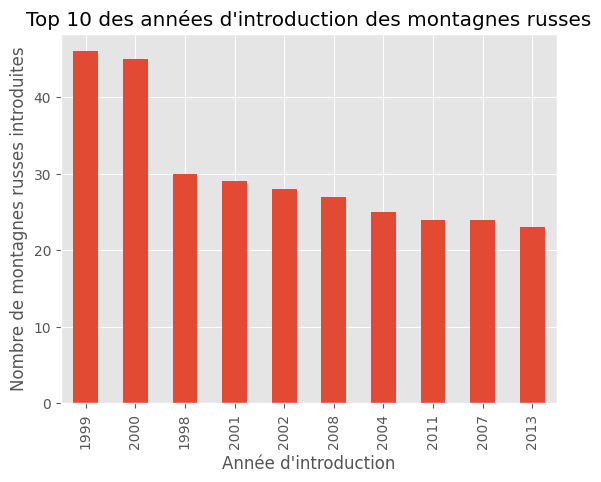

In [164]:
# Fréquence
df['year_introduced'].value_counts() 

# Visualisation
ax = df['year_introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', 
          title="Top 10 des années d'introduction des montagnes russes")

ax.set_xlabel("Année d'introduction")
ax.set_ylabel("Nombre de montagnes russes introduites")

Text(0, 0.5, 'Nombre de montagnes russes')

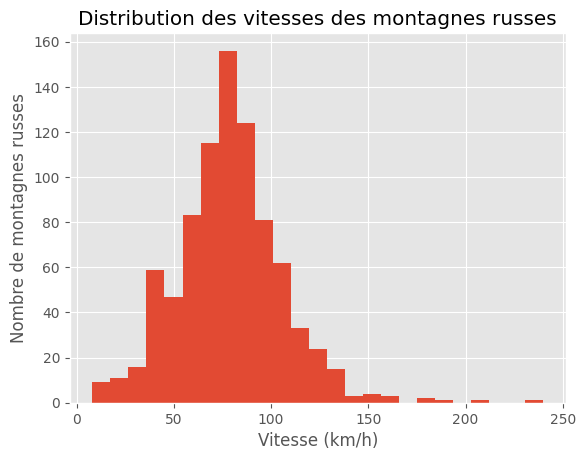

In [165]:
df["vitesse_kmh"] = df["speed_mph"] * 1.60934

ax = df['vitesse_kmh'].plot(
    kind='hist',
    bins=25,
    title="Distribution des vitesses des montagnes russes"
)

ax.set_xlabel("Vitesse (km/h)")
ax.set_ylabel("Nombre de montagnes russes")


<Axes: title={'center': 'Distribution lissée des hauteurs des montagnes russes'}, ylabel='Density'>

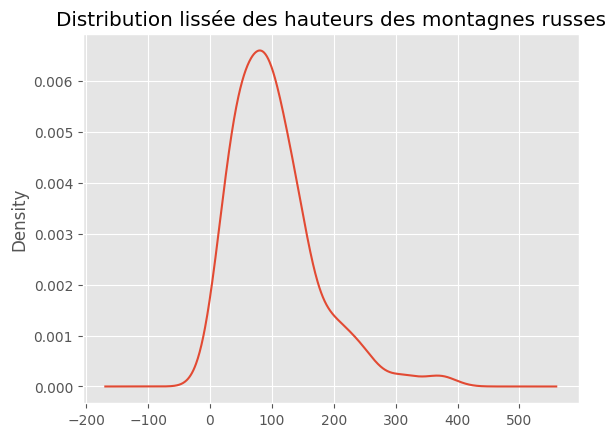

In [166]:
df['height_ft'].plot(
    kind='kde',
    title="Distribution lissée des hauteurs des montagnes russes"
)


# Step 4 : Feature Relationships

- Scatterplot  
- Heatmap Correlation
- Pairplot
- Groupby comparisions

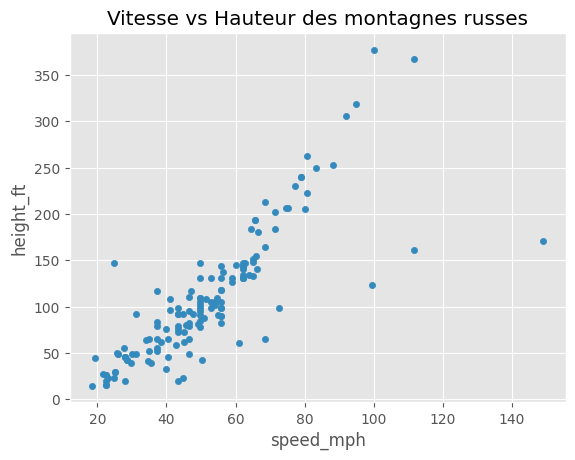

In [167]:
df.plot(kind='scatter', 
        x = 'speed_mph', 
        y = 'height_ft', 
        title= "Vitesse vs Hauteur des montagnes russes")
plt.show()

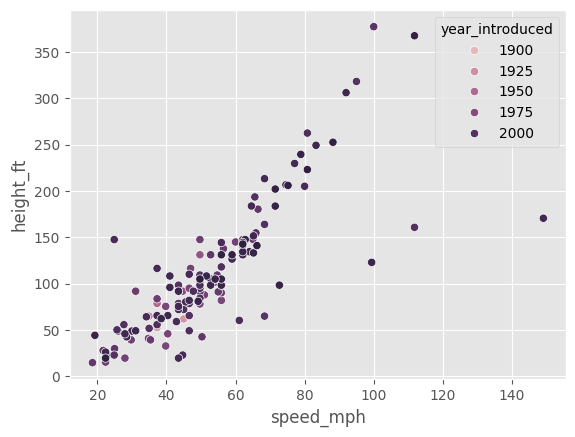

In [168]:
sns.scatterplot( data=df,
                x='speed_mph',
                y='height_ft',
                hue = 'year_introduced')
plt.show()

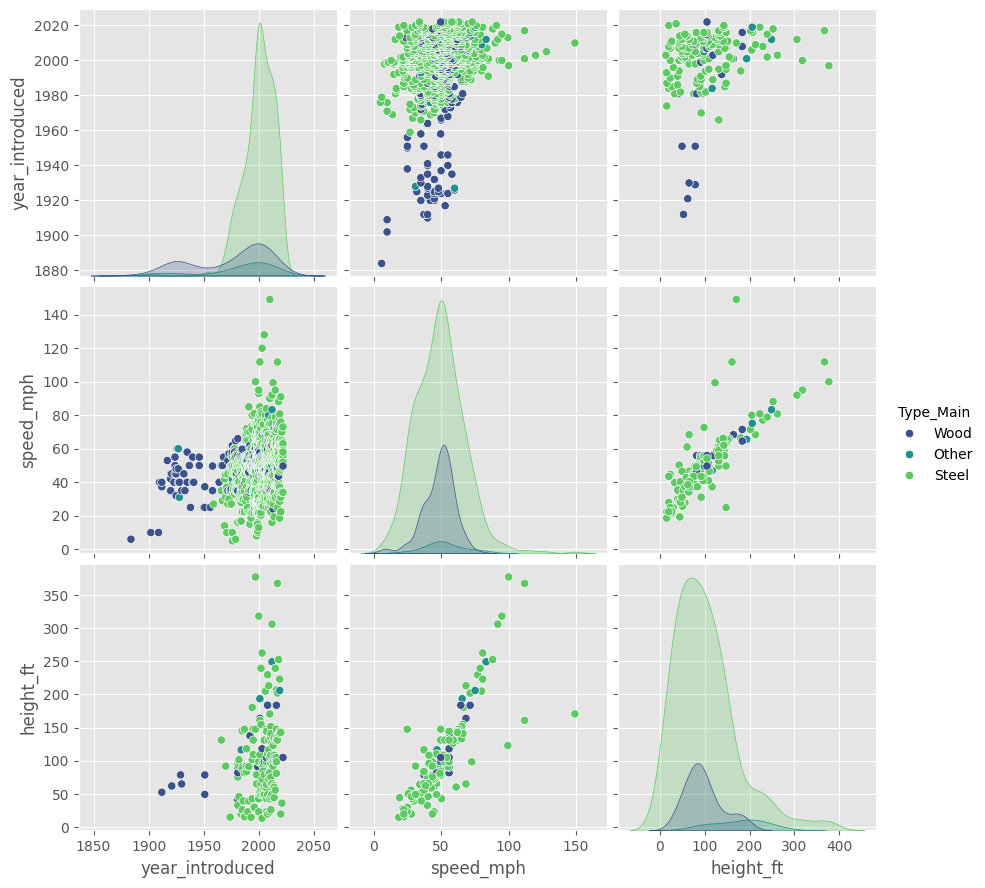

In [169]:
sns.pairplot(df, 
             vars=['year_introduced', 'speed_mph', 'height_ft'],
             hue='Type_Main',
             palette='viridis',
             height=3)
plt.show()

In [170]:
df[['year_introduced', 'speed_mph', 'height_ft', 'inversions']].dropna().corr().round(4)


,year_introduced,speed_mph,height_ft,inversions
year_introduced,1.0000,0.2669,0.2699,0.1082
speed_mph,0.2669,1.0000,0.8232,0.1345
height_ft,0.2699,0.8232,1.0000,0.1043
inversions,0.1082,0.1345,0.1043,1.0000


<Axes: >

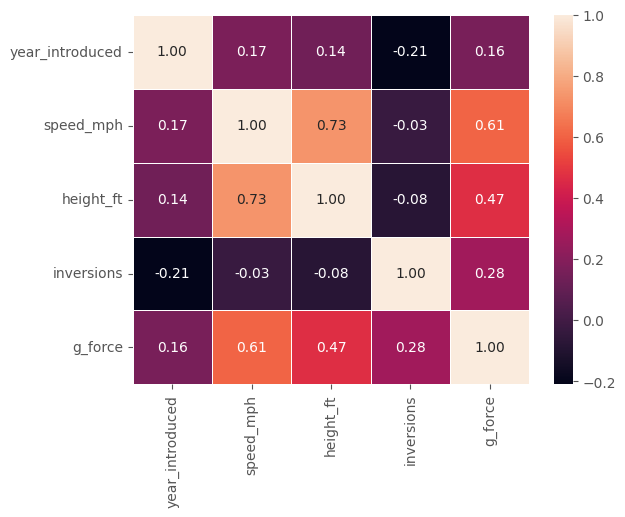

In [171]:
sns.heatmap(df[['year_introduced', 'speed_mph', 'height_ft', 'inversions', 'g_force']].dropna().corr(),
           annot=True, 
           fmt='.2f',
           linewidths=.5)

# Step 5 : Plot Map 

## Carte fixe

In [172]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

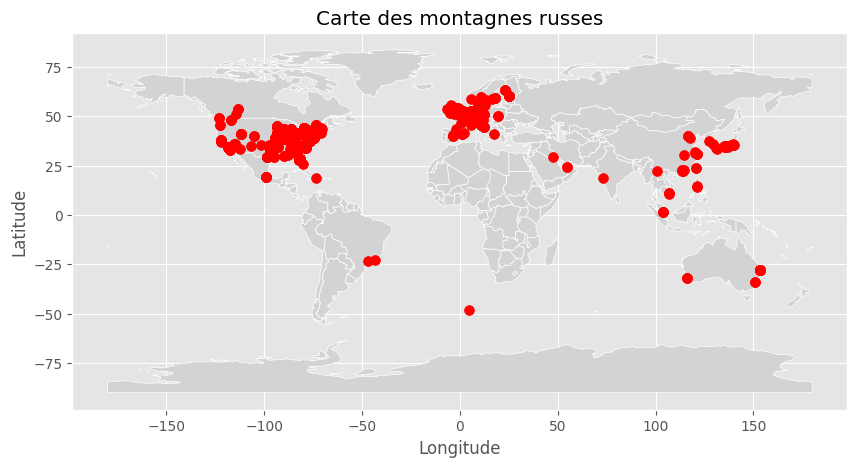

In [173]:
# Convertir les coordonnées en objets géométriques
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')  # WGS 84

# Charger un fond de carte du monde
url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

fig, ax = plt.subplots(figsize=(10, 8))
world.plot(ax=ax, color='lightgrey', edgecolor='white')
gdf.plot(ax=ax, color='red', markersize=50)

plt.title("Carte des montagnes russes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Carte interractive

In [174]:
import geopandas as gpd
import folium
import mapclassify
from matplotlib import pyplot as plt

In [175]:
# La base de donnée doit n'avoir aucun evaleur vide dans latitude et longitude
df_geo = df.dropna(subset=['latitude', 'longitude'])

# Création du GeoDataFrame
geometry = [Point(xy) for xy in zip(df_geo['longitude'], df_geo['latitude'])]
gdf = gpd.GeoDataFrame(df_geo, geometry=geometry, crs='EPSG:4326')

# Carte interactive avec seulement les points
gdf.explore()

## Carte interractive avec pop-up

In [176]:
# La base de donnée doit n'avoir aucun evaleur vide dans latitude et longitude
df_geo = df.dropna(subset=['latitude', 'longitude'])

# Création du GeoDataFrame
geometry = [Point(xy) for xy in zip(df_geo['longitude'], df_geo['latitude'])]
gdf = gpd.GeoDataFrame(df_geo, geometry=geometry, crs='EPSG:4326')

# Création de la carte avec Folium
m = folium.Map(location=[geometry[0].y, geometry[0].x], zoom_start=3)

# Ajout des marqueurs pour chaque montagne russe
for idx, row in gdf.iterrows():
    popup_content = f"""
    <b>Nom :</b> {row.get('coaster_name', 'Inconnu')}<br>
    <b>Vitesse :</b> {row.get('speed_mph', 'Inconnu')} mph<br>
    <b>Hauteur :</b> {row.get('height_ft', 'Inconnu')} ft<br>
    <b>Inversions :</b> {row.get('inversions', 'Inconnu')}
    """
    
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color='cadetblue', icon='info-sign')
    ).add_to(m)

    
m

## Petits tests 

In [177]:
# Année où il y a eu le plus de montagnes russes construites
df['year_introduced'].mode()[0]
# Retourne tous les roller coasters construits cette année-là
df.query("year_introduced == 1999").count()

coaster_name       46
Location           46
Status             39
Manufacturer       45
year_introduced    46
latitude           37
longitude          37
Type_Main          46
opening_date       35
speed_mph          41
height_ft           1
inversions         46
g_force            15
vitesse_kmh        41
dtype: int64